# Tides and Times

## Let's take a closer look at the movement of tides through the Strait of Juan de Fuca. We'll be using the tidal stations at Neah Bay, Port Angeles, and Port Townsend. Their tidal data and locations can be found at [NOAA Tides and Currents webpage.](https://tidesandcurrents.noaa.gov/map/) 

## As the tide moves through the Strait, it creates a change in the elevation of the water surface. Below we'll cycle through a tidal cycle and look at how the tide moves through the Strait. Use the slider to move through the time series and look how the measured tide at a station relates to the other stations, and its effect on the water elevation.

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import tide_utils as tide

In [3]:
NeahBay = tide.load_Neah_Bay('../Data/')
PortAngeles = tide.load_Port_Angeles('../Data/')
PortTownsend = tide.load_Port_Townsend('../Data/')

In [4]:
Tides = tide.create_tide_dataset(NeahBay,PortAngeles,PortTownsend)

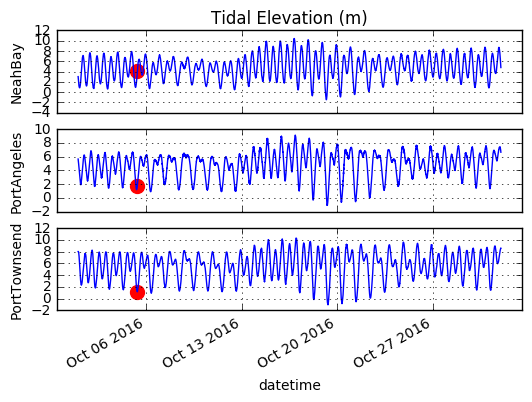

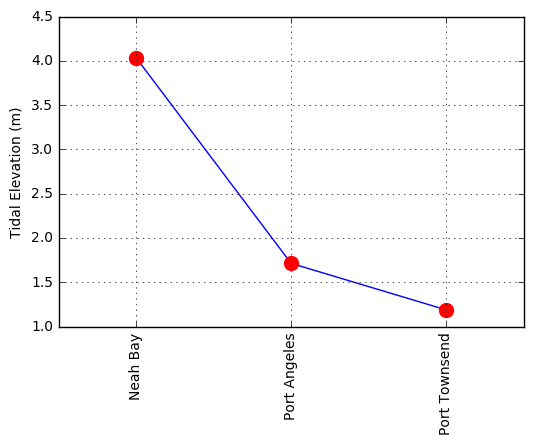

In [6]:
%matplotlib inline
tide.plot_tide_data(Tides,'2016-10-01','2016-10-31')

In [3]:
# Put in the locations of the tidal stations
NB = (48 + 22.2/60, 124 + 36.1/60)
PA = (48 + 7.5/60, 123 + 26.5/60)
PT = (48 + 6.8/60, 122 + 45.6/60)

In [4]:
latlon = [NB, PA, PT]

In [5]:
latlon

[(48.37, 124.60166666666667),
 (48.125, 123.44166666666666),
 (48.11333333333334, 122.76)]

In [7]:
import gmaps
markers = gmaps.marker_layer(latlon)
m = gmaps.Map()
m.add_layer(markers)
m

## From this code we can start generating useful functions

## Load the tidal csv data and put into a single dataframe and create a useful datetime index